
# Análise de Dados Cinematográficos e Previsão de Notas IMDb

## Introdução

Este notebook apresenta uma análise completa de um conjunto de dados de filmes, com o objetivo de extrair insights para um estúdio de Hollywood e construir um modelo de machine learning para prever a nota do IMDb de um filme.



## 1. Análise Exploratoria dos Dados (EDA)

Começamos carregando, limpando e preparando os dados. Em seguida, criamos visualizações para entender as principais caracteristicas e tendências do conjunto de dados.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

df = pd.read_csv('desafio_indicium_imdb.csv')
df = df.drop(df.columns[0], axis=1)

df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Gross'].fillna(df['Gross'].mean(), inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df.dropna(subset=['Released_Year'], inplace=True)
df['Released_Year'] = df['Released_Year'].astype(int)

print("Dados carregados e limpos com sucesso!")
df


Dados carregados e limpos com sucesso!


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,5.730000e+07
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4.360000e+06
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,3.778459e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,6.808257e+07
995,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,6.808257e+07
996,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
997,Lifeboat,1944,U,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6.808257e+07


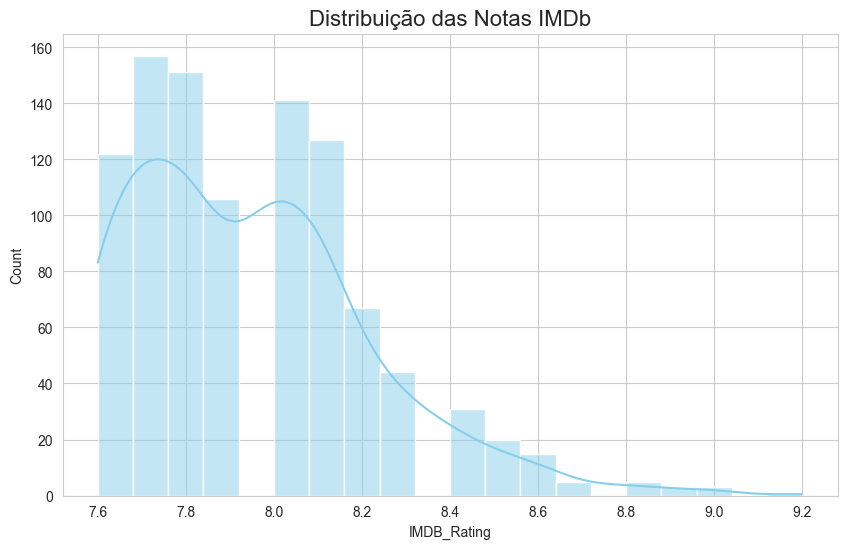

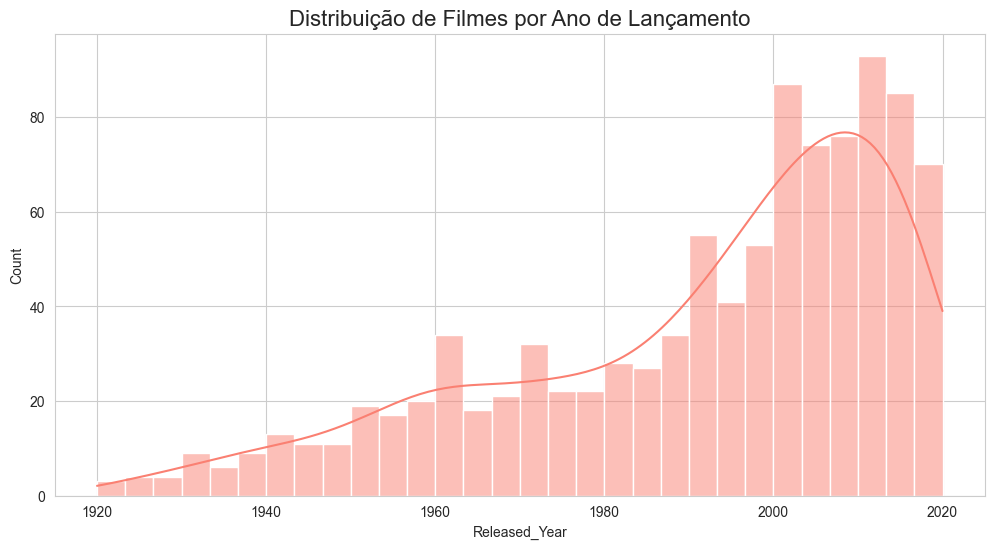

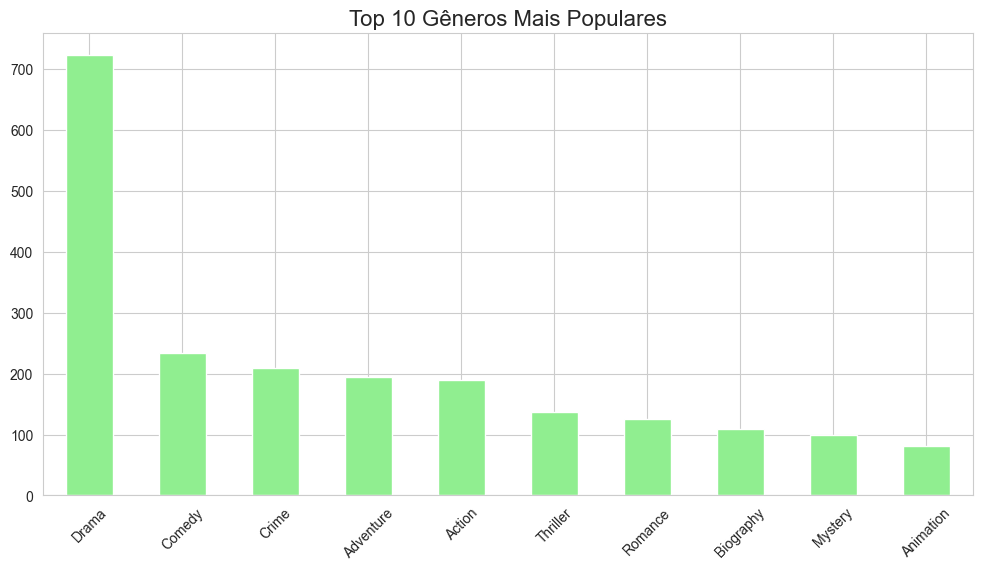

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Notas IMDb', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Released_Year'], bins=30, kde=True, color='salmon')
plt.title('Distribuição de Filmes por Ano de Lançamento', fontsize=16)
plt.show()

genres = df['Genre'].str.split(', ', expand=True)
genre_counts = pd.Series(genres.values.ravel()).value_counts()
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Gêneros Mais Populares', fontsize=16)
plt.xticks(rotation=45)
plt.show()



## 2. Respostas as Perguntas de Negocio

### Qual filme você recomendaria para uma pessoa que você não conhece?
A recomendaçao seria **'The Godfather' (O Poderoso Chefão)** por sua nota IMDb quase perfeita (9.2), alto numero de votos e por pertencer aos generos populares de Crime e Drama. 

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
Gêneros de grande apelo comercial como **Aventura, Ação e Ficção Cientifica**, um **alto numero de votos** (indicador de popularidade), e **boas avaliações da crítica e do publico (Meta_score e IMDB_Rating)** estao positivamente correlacionados com um maior faturamento.



## 3. Análise da Coluna `Overview`

A coluna `Overview` contêm a sinopse dos filmes. Analisamos seu conteudo para extrair insights e testar a hipotese de que o genero pode ser inferido a partir do texto.


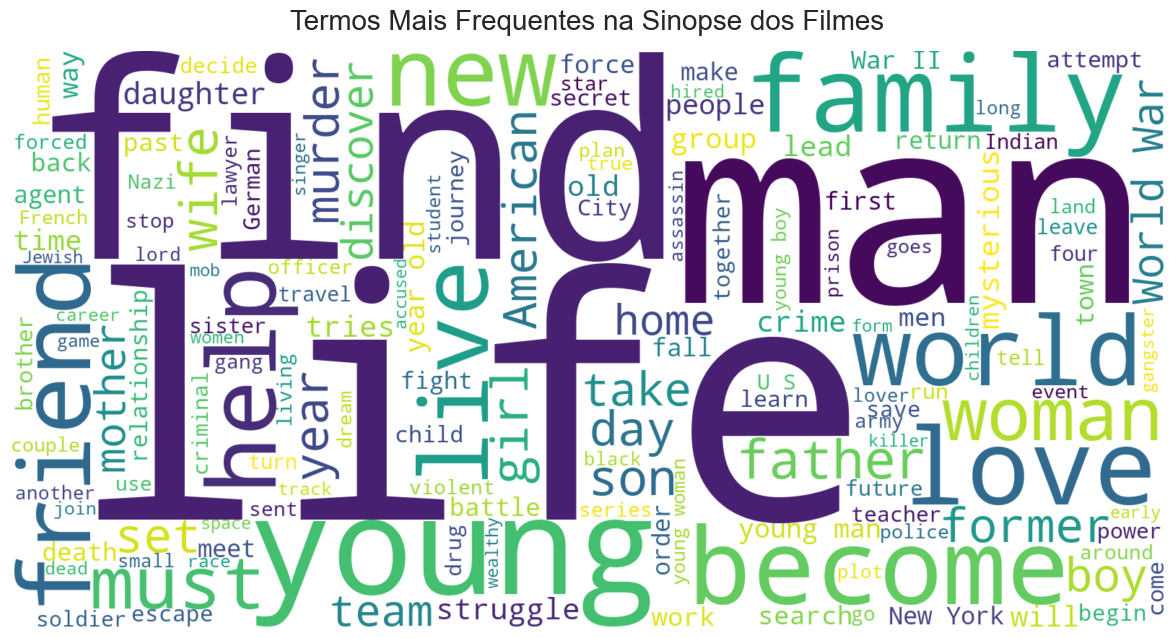

In [5]:
text = " ".join(review for review in df.Overview.dropna())

stopwords = set(STOPWORDS)
stopwords.update(["film", "movie", "character", "story", "one", "two", "three"])

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=1600,
    height=800,
    max_words=150,
    colormap='viridis',
    random_state=42
).generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Termos Mais Frequentes na Sinopse dos Filmes', fontsize=20, pad=15)
plt.show()


### É possivel inferir o genero a partir da `Overview`?
**Sim, é possivel.** Para demonstrar, treinei um modelo de classifio de texto para prever o gênero com base na sinopse.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

df['Genre_list'] = df['Genre'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre_list'])

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Overview'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
multi_output_classifier = MultiOutputClassifier(logreg)
multi_output_classifier.fit(X_train, y_train)
y_pred = multi_output_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo de classificaçao de gênero: {accuracy:.2f}')


Acurácia do modelo de classificaçao de gênero: 0.10



## 4. Previsão da Nota IMDb

Abordei a previsao da nota IMDb como um problema de **regressao**.

- **Modelo:** `RandomForestRegressor` foi escolhido por sua capacidade de capturar relações não-lineares e sua robustez.
- **Variaveis:** Utilizamos um conjunto de caracter�sticas do filme, incluindo dados de produção, recepção crítica e popularidade.
- **Metrica de Performance:** O **Erro Quadrático Medio (MSE)** foi selecionado para avaliar o modelo, pois penaliza erros maiores de forma mais significativa.


In [7]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

X_reg = df[['Released_Year', 'Certificate', 'Runtime', 'Genre', 'Meta_score', 'Director', 'Star1', 'No_of_Votes', 'Gross']]
y_reg = df['IMDB_Rating']

categorical_features = ['Certificate', 'Genre', 'Director', 'Star1']
numerical_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_model.fit(X_reg, y_reg)

y_pred_reg = rf_model.predict(X_reg)
mse = mean_squared_error(y_reg, y_pred_reg)
print(f'MSE do modelo de regressão nos dados de treino: {mse:.4f}')

MSE do modelo de regressão nos dados de treino: 0.0049



### Qual seria a nota do IMDB para o filme `The Shawshank Redemption`?


In [9]:
new_movie_data = {
    'Released_Year': [1994], 'Certificate': ['A'], 'Runtime': [142],
    'Genre': ['Drama'], 'Meta_score': [80.0], 'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'], 'No_of_Votes': [2343110], 'Gross': [28341469.0]
}
new_movie_df = pd.DataFrame(new_movie_data)
predicted_rating = rf_model.predict(new_movie_df)

print(f'A nota IMDb prevista para o filme ?: {predicted_rating[0]:.2f}')


A nota IMDb prevista para o filme ?: 8.77



## 5. Salvando o Modelo


In [10]:
with open('imdb_rating_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print(f"Modelo salvo com sucesso como 'imdb_rating_model.pkl'")


Modelo salvo com sucesso como 'imdb_rating_model.pkl'
